In [1]:
import osmnx as ox
import networkx as nx
import pickle 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import matplotlib.patches as mpatches
from scipy.sparse import spdiags
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
import multiprocessing

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 11

path = 'Distance'
os.chdir('C:/Users/Besitzer/Desktop/Geospatial Analysis/')

In [102]:
nodes = []
oneway_prop = []
for file in os.listdir('Data'):
    data = pd.read_pickle('Data/' + file)
    nodes.append(data['n'])
    oneway_prop.append(data['oneway']/data['m'])

In [91]:
mean_dist = []
for file in os.listdir(path):
    if 'distance_pro_' in file:
        #print(file)
        data = pd.read_pickle(path + '/' + file)
        mean_dist.append(data[0][0])

In [92]:
mean_dist

[4016.9689322658114,
 3427.3531993177307,
 3936.944174362088,
 3395.690434134863,
 3688.028469484976,
 3639.876309046009,
 3626.659036970004,
 3925.1272267884206]

In [98]:
nodes

[6297,
 4143,
 6735,
 3848,
 3373,
 3278,
 3936,
 3309,
 5993,
 2652,
 4950,
 7132,
 6925,
 3836,
 4974,
 5998,
 4051,
 4278,
 3851,
 3073,
 2954,
 2698,
 2632,
 3240,
 2637,
 6723,
 9920,
 5401,
 8489,
 4637,
 4055,
 7394,
 3770,
 4172,
 13609,
 4383,
 6412,
 4325,
 18416,
 6826,
 6207,
 5055,
 6488,
 2438,
 5444,
 6394,
 8945,
 7379,
 3499,
 19289,
 2988,
 5991,
 7568,
 6025,
 6986,
 5639,
 3091,
 3772]

In [74]:
dist_dist = []
for file in os.listdir(path):
    if 'distance_dist_' in file:
        #print(file)
        data = pd.read_pickle(path + '/' + file)
        dataset = data[0]
        for i in range(6):
            infinite = dataset[i].count(np.inf)
            dataset[i] = list(filter(lambda a: a != np.inf, dataset[i]))
            if i != 0:
                for j in range(len(dataset[i])-1,0,-1):
                    if j != 0:
                        dataset[i][j] -= dataset[i][j-1] 
        dist_dist.append(dataset)

distance_dist_Amsterdam.pkl
distance_dist_Antwerp.pkl
distance_dist_Barcelona.pkl
distance_dist_Basel.pkl
distance_dist_Berlin.pkl
distance_dist_Bilbao.pkl
distance_dist_Bologna.pkl
distance_dist_Bonn.pkl


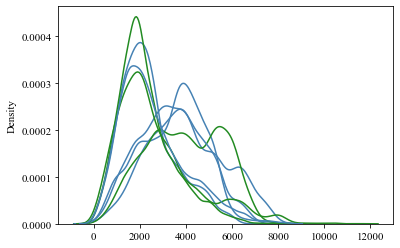

In [107]:
fig, ax1 = plt.subplots()
for i in range(8):
    if oneway_prop[i] < 0.4:#nodes[i] < 5000:
        sns.kdeplot(dist_dist[i][0], x="value", color = 'steelblue')
    else:
        sns.kdeplot(dist_dist[i][0], x="value", color = 'forestgreen')
# sns.kdeplot(dist_dist[1][0], x="value")
# sns.kdeplot(dist_dist[2][0], x="value")
# sns.kdeplot(dist_dist[3][0], x="value")
# sns.kdeplot(dist_dist[4][0], x="value")
# sns.kdeplot(dist_dist[5][0], x="value")
# sns.kdeplot(dist_dist[6][0], x="value")
# sns.kdeplot(dist_dist[7][0], x="value")


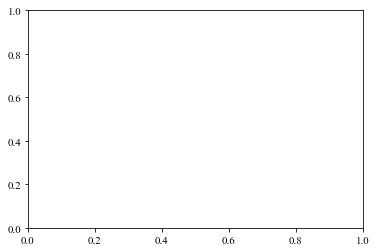

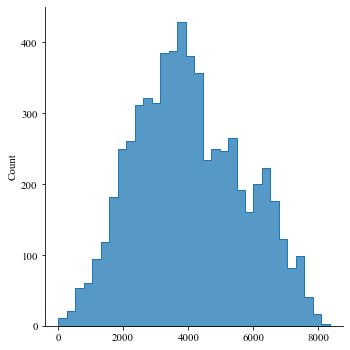

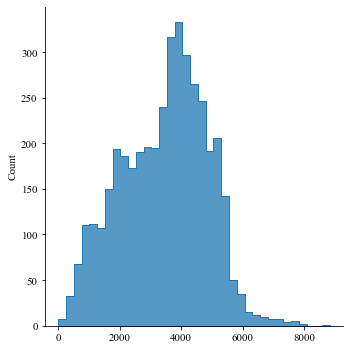

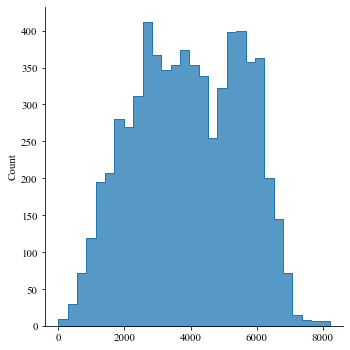

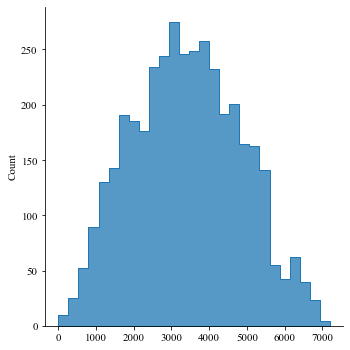

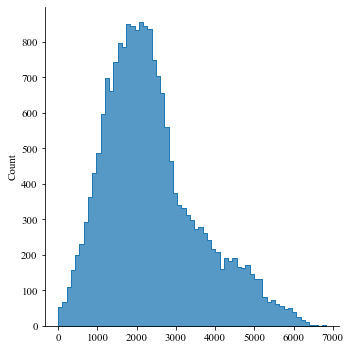

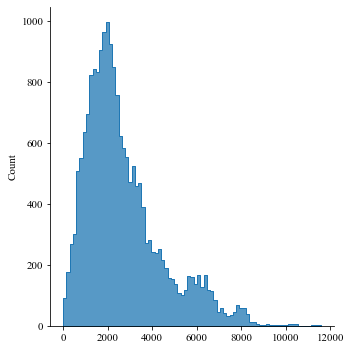

In [80]:
fig =plt.subplots()
ax = sns.displot(dist_dist[0][0], element="step")
ax = sns.displot(dist_dist[1][0], element="step")
ax = sns.displot(dist_dist[2][0], element="step")
ax = sns.displot(dist_dist[3][0], element="step")
ax = sns.displot(dist_dist[4][0], element="step")
ax = sns.displot(dist_dist[5][0], element="step")
plt.show()

In [58]:
dataset[2]

[457.397,
 2161.2549999999997,
 392.4870000000001,
 1456.476,
 3922.8900000000012,
 1639.1890000000003,
 1486.5149999999994,
 1435.7710000000006,
 1796.2559999999994,
 1520.923999999999,
 3014.7829999999994,
 3166.042999999998,
 3119.010000000002,
 1617.2119999999995,
 1809.987000000001,
 1603.061999999998,
 2220.095000000001,
 1629.5979999999981,
 1584.2419999999984,
 1523.4689999999973,
 1416.5239999999976,
 1582.739999999998,
 3084.8169999999955,
 2963.648000000001,
 2911.8269999999975,
 6703.088000000003,
 6679.625000000007,
 2880.342000000004,
 2969.173999999999,
 1349.8610000000044,
 1416.929999999993,
 1384.3070000000007,
 1418.2590000000055,
 1548.8150000000023,
 1600.028999999995,
 2677.5179999999964,
 1418.1000000000058,
 2116.3199999999924,
 3657.785999999993,
 3721.4419999999955,
 1620.827999999994,
 3855.027000000002,
 1668.3669999999984,
 1755.9619999999995,
 1505.9700000000012,
 2387.1589999999997,
 2195.967000000004,
 2901.4679999999935,
 729.3940000000002,
 1377.335000

In [45]:
dataset[2].remove(np.inf)

In [50]:
dataset[2] = list(filter(lambda a: a != np.inf, dataset[2]))

In [51]:
len(dataset[2])

4104